In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Importing the data

In [2]:
student = pd.read_csv("/Users/victoriablante/Downloads/StudentPerformanceFactors.csv")

# First sniff of the data

In [3]:
student.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [17]:
student.shape

(6607, 20)

In [9]:
student.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
student.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [11]:
student.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

# Variable types

In [22]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [25]:
for column in student:
    print(student[column].value_counts())

Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
6      17
4      17
3      12
36     11
38      7
39      7
37      6
2       6
1       3
43      1
44      1
Name: count, dtype: int64
Attendance
67     190
98     187
76     185
77     184
64     182
94     180
84     175
79     175
91     175
82     173
68     170
69     170
80     169
81     168
96     168
73     168
93     167
72     167
74     165
78     165
61     164
95     163
89     162
71     162
97     161
70     161
65     158
83     157
90     156
88     155
63     155
99     154
92     154
62     152
86     151
87     151
75     149
85     146
66     145
60      87
100     81
Name: count, dtype: int64
Parental_Involvement
Medium    3362
High      1908
Low       1

## Changing variable types (int to categorical)

In [26]:
categorical_variables = ['Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']
student[categorical_variables] = student[categorical_variables].astype('category')
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   object  
 3   Access_to_Resources         6607 non-null   object  
 4   Extracurricular_Activities  6607 non-null   object  
 5   Sleep_Hours                 6607 non-null   category
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   object  
 8   Internet_Access             6607 non-null   object  
 9   Tutoring_Sessions           6607 non-null   category
 10  Family_Income               6607 non-null   object  
 11  Teacher_Quality             6529 non-null   object  
 12  School_Type                 6607 non-null   object  
 13  Peer_Influence    

# First visualizations

array([[<Axes: title={'center': 'Hours_Studied'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Sleep_Hours'}>],
       [<Axes: title={'center': 'Previous_Scores'}>,
        <Axes: title={'center': 'Tutoring_Sessions'}>,
        <Axes: title={'center': 'Physical_Activity'}>],
       [<Axes: title={'center': 'Exam_Score'}>, <Axes: >, <Axes: >]],
      dtype=object)

findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.

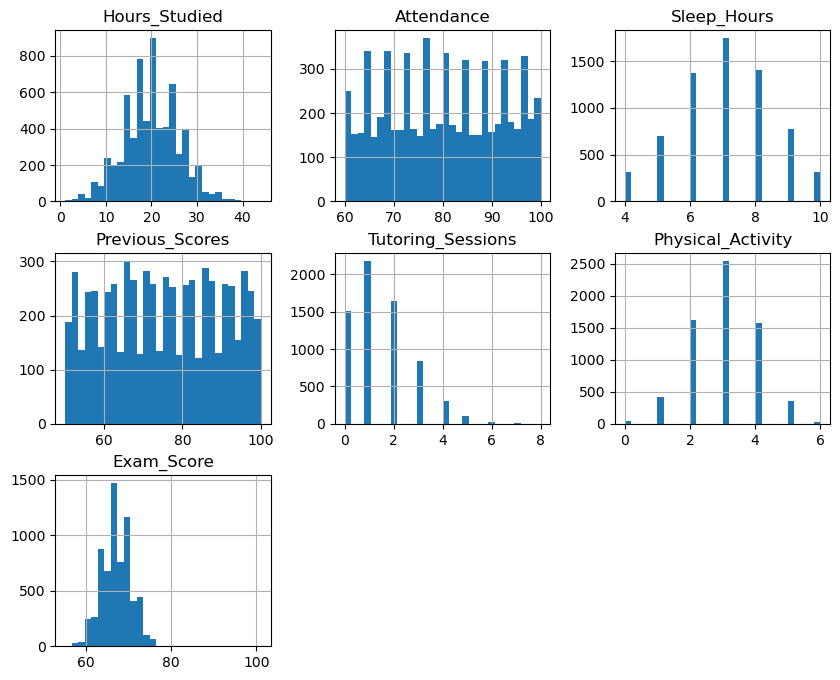

In [16]:
student.hist(figsize=(10, 8), bins=30)


findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.

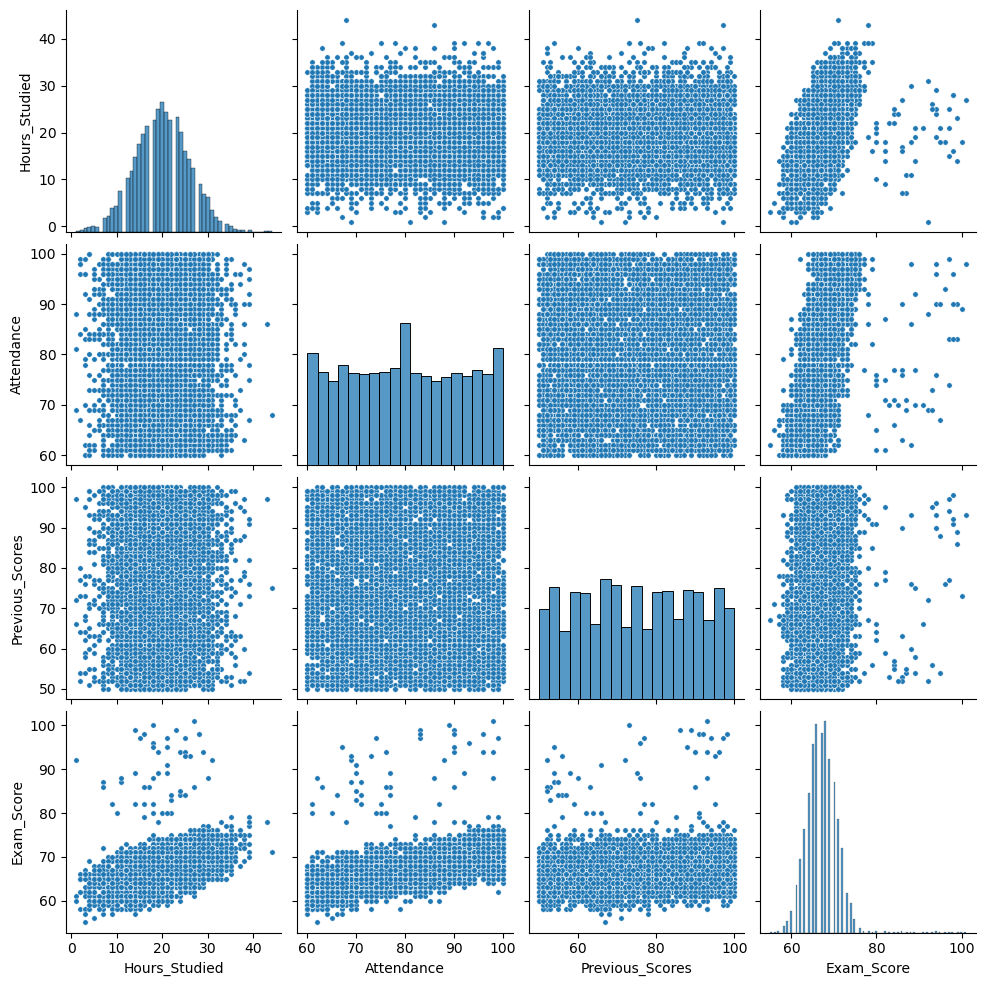

In [27]:
sns.pairplot(student, diag_kind='hist', plot_kws={'s': 15})
plt.show()